<a href="https://colab.research.google.com/github/gsandhya4203/Employee-Registration/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
inception_weights_path = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'

In [ ]:
!git clone https://github.com/laxmimerit/male-female-face-dataset.git

Cloning into 'male-female-face-dataset'...
remote: Enumerating objects: 58657, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 58657 (delta 0), reused 0 (delta 0), pack-reused 58656
Receiving objects: 100% (58657/58657), 261.44 MiB | 37.68 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (58659/58659), done.


In [ ]:
epochs = 50
lr = 1e-3
batch_size=128
data = []
labels = []

In [ ]:
size = 224

Image Data Genrator


In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,width_shift_range=0.4,height_shift_range=0.4,zoom_range=0.3,rotation_range=20,rescale=1/255)

In [ ]:
test_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
target_size=(size,size)
target_size

(224, 224)

In [ ]:
train_generator=train_datagen.flow_from_directory(directory='/content/male-female-face-dataset/Training',target_size=target_size,batch_size=batch_size,class_mode='binary')

Found 47009 images belonging to 2 classes.


In [ ]:
validation_generator = test_gen.flow_from_directory(directory='/content/male-female-face-dataset/Training',target_size=target_size,batch_size=batch_size,class_mode='binary')

Found 47009 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'female': 0, 'male': 1}

In [ ]:
len(train_generator.classes)

47009

In [ ]:
train_generator.class_mode

'binary'

In [ ]:
x,y = train_generator.next()

In [ ]:
x[0].shape

(224, 224, 3)

In [ ]:
x[0]

array([[[0.22352943, 0.10980393, 0.09411766],
        [0.22352943, 0.10980393, 0.09411766],
        [0.22352943, 0.10980393, 0.09411766],
        ...,
        [0.36709753, 0.18446118, 0.14566484],
        [0.31777713, 0.14990796, 0.11650962],
        [0.3109364 , 0.14443536, 0.11445738]],

       [[0.22352943, 0.10980393, 0.09411766],
        [0.22352943, 0.10980393, 0.09411766],
        [0.22352943, 0.10980393, 0.09411766],
        ...,
        [0.35951033, 0.17920852, 0.14099582],
        [0.32156864, 0.15294118, 0.11764707],
        [0.32156864, 0.15294118, 0.11764707]],

       [[0.2518977 , 0.14075115, 0.12764382],
        [0.24437287, 0.13254224, 0.11875083],
        [0.23684804, 0.12433333, 0.10985783],
        ...,
        [0.3540217 , 0.17446296, 0.13641608],
        [0.32156864, 0.15294118, 0.11764707],
        [0.32156864, 0.15294118, 0.11764707]],

       ...,

       [[0.04313726, 0.02352941, 0.01176471],
        [0.04313726, 0.02352941, 0.01176471],
        [0.04313726, 0

Build ML model

In [ ]:
model=Sequential()
model.add(InceptionV3(include_top=False, pooling='avg',weights='imagenet'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.layers[0].trainable=False


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 batch_normalization_95 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1024)              2

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
len((train_generator.filenames)), batch_size, len((train_generator.filenames))//batch_size, epochs

(47009, 128, 367, 50)

In [ ]:
model.fit(train_generator, steps_per_epoch=len(train_generator.filenames)//batch_size,
          epochs=2, validation_data=validation_generator, validation_steps=len(validation_generator.filenames)//batch_size)

Epoch 1/2
367/367 [==============================] - 596s 2s/step - loss: 0.3762 - accuracy: 0.8481 - val_loss: 0.2735 - val_accuracy: 0.8865
Epoch 2/2
367/367 [==============================] - 580s 2s/step - loss: 0.3079 - accuracy: 0.8697 - val_loss: 0.3689 - val_accuracy: 0.8612


Test Model

In [ ]:
#img_path = '/content/male-female-face-dataset/Validation/female/112956.jpg.jpg'
img_path = '/content/hod.jpg'

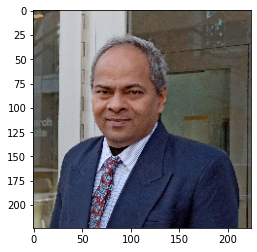

In [ ]:
img = load_img(img_path, target_size=(size, size, 3))
plt.imshow(img)

In [ ]:
img = img_to_array(img)

In [ ]:
img

array([[[ 60.,  59.,  54.],
        [ 73.,  72.,  67.],
        [ 65.,  66.,  61.],
        ...,
        [ 97.,  90.,  82.],
        [100.,  93.,  87.],
        [ 93.,  88.,  82.]],

       [[ 61.,  58.,  53.],
        [ 65.,  62.,  57.],
        [ 65.,  66.,  61.],
        ...,
        [100.,  93.,  85.],
        [102.,  95.,  89.],
        [ 99.,  94.,  88.]],

       [[ 64.,  61.,  54.],
        [ 71.,  68.,  63.],
        [ 86.,  85.,  80.],
        ...,
        [100.,  93.,  83.],
        [102.,  95.,  87.],
        [101.,  96.,  90.]],

       ...,

       [[180., 179., 151.],
        [170., 169., 141.],
        [176., 175., 145.],
        ...,
        [100.,  90.,  78.],
        [104.,  94.,  85.],
        [100.,  93.,  83.]],

       [[176., 175., 147.],
        [168., 167., 139.],
        [174., 173., 143.],
        ...,
        [100.,  90.,  78.],
        [106.,  96.,  87.],
        [ 95.,  88.,  78.]],

       [[175., 174., 144.],
        [169., 165., 136.],
        [170., 1

In [ ]:
img = img/255.0

In [ ]:
img = img.reshape(1, size, size, 3)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img)

1/1 [==============================] - 0s 24ms/step


array([[0.94392353]], dtype=float32)

In [ ]:
train_generator.class_indices

{'female': 0, 'male': 1}

In [ ]:
def get_classes(data):
  prob = model.predict(img)[0][0]

  if prob<0.5:
    return 'female', (1 - prob)
  else:
    return 'male', prob

In [ ]:
get_classes(img)

1/1 [==============================] - 0s 24ms/step


('male', 0.94392353)